## Part 0: Environment Setup

Loading the Churn CSV into a data frame.
I will be loading and using the following modules for this project:

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

df = pd.read_csv('churn_raw_data.csv', index_col=0)

## Part I: Research Question

### A. Description of Question

In the telecommunications industry, customers can choose from multiple service providers and actively switch from one provider to another. Customer “churn” is defined as the percentage of customers who stopped using a provider’s product or service during a certain time frame. In this highly competitive market, some telecommunications industries can experience average annual churn rates as high as 25 percent. Given that it costs 10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition. For many providers, retaining highly profitable customers is the number one business goal. To reduce customer churn, telecommunications companies need to predict which customers are at high risk of churn. You are an analyst on a team of analysts in a popular telecommunications company, which serves customers in all regions of the United States. You have been asked to clean the raw data set in preparation to explore the data, identify trends, and compare key metrics.

The question I will be posing: Given the cost in acquiring new customers versus maintaining current customers, which factors tend to lead to customer churn, or a higher churn rate? Some factors may include:

* service outages
* service costs too much
* not enough use of service
* too many technical problems
* low quality tech support
* not technically inclined enough paired with low quality technical support


 


### B. Describe Variables

In this section, I will review the types of data present in the dataset, review statistics on the dataset, and describe the variables in the dataset.



Summary Statistics of the dataset with unneccessary variables:

In [2]:
df = df.drop(columns=['Interaction', 'CaseOrder',  'Zip', 'Lat', 'Lng', 'Techie', 'Phone', 'TechSupport', 'item1', 'item2', 'item3', 'item4', 'item5', 'item6', 'item7', 'item8'])
df.describe()

,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
count,10000.000000,7505.000000,7525.000000,7510.000000,10000.000000,10000.000000,10000.000000,10000.000000,9069.000000,10000.000000,8979.000000
mean,9756.562400,2.095936,53.275748,39936.762226,11.452955,12.016000,0.994200,0.398000,34.498858,174.076305,3398.842752
std,14432.698671,2.154758,20.753928,28358.469482,7.025921,3.025898,0.988466,0.635953,26.438904,43.335473,2187.396807
min,0.000000,0.000000,18.000000,740.660000,-1.348571,1.000000,0.000000,0.000000,1.000259,77.505230,155.506715
25%,738.000000,0.000000,35.000000,19285.522500,8.054362,10.000000,0.000000,0.000000,7.890442,141.071078,1234.110529
50%,2910.500000,1.000000,53.000000,33186.785000,10.202896,12.000000,1.000000,0.000000,36.196030,169.915400,3382.424000
75%,13168.000000,3.000000,71.000000,53472.395000,12.487644,14.000000,2.000000,1.000000,61.426670,203.777441,5587.096500
max,111850.000000,10.000000,89.000000,258900.700000,47.049280,23.000000,7.000000,6.000000,71.999280,315.878600,7158.982000


Shape of the dataset:

In [3]:
df.shape

(10000, 35)

Object types will be categorical variables. float64 and int64 will be numerical variables.

Review of the types of data in the dataset:

In [4]:
df.dtypes

Customer_id              object
City                     object
State                    object
County                   object
Population                int64
Area                     object
Timezone                 object
Job                      object
Children                float64
Age                     float64
Education                object
Employment               object
Income                  float64
Marital                  object
Gender                   object
Churn                    object
Outage_sec_perweek      float64
Email                     int64
Contacts                  int64
Yearly_equip_failure      int64
Contract                 object
Port_modem               object
Tablet                   object
InternetService          object
Multiple                 object
OnlineSecurity           object
OnlineBackup             object
DeviceProtection         object
StreamingTV              object
StreamingMovies          object
PaperlessBilling         object
PaymentM

# Part II

## C. Cleaning Plan

In this section, I will explain the plan for cleaning the data. 

My approach will be as follows:
* Identify null values
* Identify NA or zero values where that input does not make sense
* Identify areas with missing values
* Identify method to finding typographical errors

For all of the above, I will identify an appropriate approach to managing unclean data.

Relevant techniques and specific steps to identify anomalies in the data set will be expressed in the below python code.

#### Finding nulls and null values

In [5]:
# Finding which rows have null values.
df.isnull()

,Customer_id,City,State,County,Population,Area,Timezone,Job,Children,Age,...,OnlineSecurity,OnlineBackup,DeviceProtection,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year
1,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,True,False,False
9999,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


It looks to be good. Let's look closer.

In [6]:
# Shows which specific columns have NAs in them
df.isna().any()

Customer_id             False
City                    False
State                   False
County                  False
Population              False
Area                    False
Timezone                False
Job                     False
Children                 True
Age                      True
Education               False
Employment              False
Income                   True
Marital                 False
Gender                  False
Churn                   False
Outage_sec_perweek      False
Email                   False
Contacts                False
Yearly_equip_failure    False
Contract                False
Port_modem              False
Tablet                  False
InternetService         False
Multiple                False
OnlineSecurity          False
OnlineBackup            False
DeviceProtection        False
StreamingTV             False
StreamingMovies         False
PaperlessBilling        False
PaymentMethod           False
Tenure                   True
MonthlyCha

Age, Children, Income, Tenure, Bandwidth_GB_Year all contain NA values that must be dealt with.

In [7]:
# How many rows, and which rows, have null data?

null_data_rows = df.isnull().sum()
print(null_data_rows)

Customer_id                0
City                       0
State                      0
County                     0
Population                 0
Area                       0
Timezone                   0
Job                        0
Children                2495
Age                     2475
Education                  0
Employment                 0
Income                  2490
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Contract                   0
Port_modem                 0
Tablet                     0
InternetService            0
Multiple                   0
OnlineSecurity             0
OnlineBackup               0
DeviceProtection           0
StreamingTV                0
StreamingMovies            0
PaperlessBilling           0
PaymentMethod              0
Tenure                   931
MonthlyCharge              0
Bandwidth_GB_Y

In [8]:
# This will show rows from this data frame that do contain missing values

df_missing_values = df.isnull().any(axis=1)
df[df_missing_values]

,Customer_id,City,State,County,Population,Area,Timezone,Job,Children,Age,...,OnlineSecurity,OnlineBackup,DeviceProtection,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year
1,K409198,Point Baker,AK,Prince of Wales-Hyder,38,Urban,America/Sitka,Environmental health practitioner,NaN,68.0,...,Yes,Yes,No,No,Yes,Yes,Credit Card (automatic),6.795513,171.449762,904.536110
3,K191035,Yamhill,OR,Yamhill,3735,Urban,America/Los_Angeles,Chief Financial Officer,4.0,50.0,...,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.440398,2054.706961
6,W303516,Fort Valley,GA,Peach,17701,Urban,America/New_York,Chief Technology Officer,3.0,83.0,...,Yes,Yes,Yes,No,Yes,No,Electronic Check,7.000994,184.401558,1039.357983
7,U335188,Pioneer,TN,Scott,2535,Suburban,America/New_York,"Surveyor, hydrographic",0.0,NaN,...,No,No,No,Yes,Yes,No,Electronic Check,13.236774,200.064886,1907.242972
8,V538685,Oklahoma City,OK,Oklahoma,23144,Suburban,America/Chicago,Sales promotion account executive,2.0,NaN,...,No,Yes,No,No,No,Yes,Mailed Check,NaN,114.754111,979.612708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,P175475,West Kill,NY,Greene,210,Urban,America/New_York,Youth worker,NaN,46.0,...,Yes,No,Yes,No,Yes,No,Credit Card (automatic),NaN,143.687900,4945.756000
9996,M324793,Mount Holly,VT,Rutland,640,Rural,America/New_York,Sport and exercise psychologist,3.0,NaN,...,No,Yes,Yes,No,No,No,Electronic Check,68.197130,159.828800,6511.253000
9997,D861732,Clarksville,TN,Montgomery,77168,Rural,America/Chicago,Consulting civil engineer,4.0,48.0,...,Yes,Yes,Yes,Yes,No,No,Electronic Check,61.040370,208.856400,5695.952000
9998,I243405,Mobeetie,TX,Wheeler,406,Rural,America/Chicago,IT technical support officer,NaN,NaN,...,Yes,Yes,No,No,No,Yes,Bank Transfer(automatic),NaN,168.220900,4159.306000


### C3. Justification of Tools

For this project, I will use Python because of the libraries available. While R could be used, I have more experience with Python through other projects.

I used the following packages as well specifically for this project:
    
* NumPy - for creating and manipulating matrices
* pandas - for using data frames, importing CSV, exporting CSV, and manipulating tables/rows/cells
* PCA through sci-kit learn - PCA used specifically to perform principle component analysis
* matplotlib - used to create graphs/charts for data visualization

I used Jupyter notebooks for this project because it provides a very useful way to run, test, and write code with immediate visual results. I use it also because of the ability to create markdown documents which allow for easy visualization.

Using the above languages, tools, programs, libraries, and applications allows me to create a running-document. This allows me to use tools that already exist to perform a task.

#### Finding typos and similar mistakes

I will run unique() on select categorical rows and use the output to determine if there are any blaring typographical errors that present themselves.

In [9]:
# Look at unique employment values
df['Employment'].unique()

array(['Part Time', 'Retired', 'Student', 'Full Time', 'Unemployed'],
      dtype=object)

In [10]:
# Look at unique area values
df['Area'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [11]:
# Look at unique timezone values
df['Timezone'].unique()

array(['America/Sitka', 'America/Detroit', 'America/Los_Angeles',
       'America/Chicago', 'America/New_York', 'America/Puerto_Rico',
       'America/Denver', 'America/Menominee', 'America/Phoenix',
       'America/Indiana/Indianapolis', 'America/Boise',
       'America/Kentucky/Louisville', 'Pacific/Honolulu',
       'America/Indiana/Petersburg', 'America/Nome', 'America/Anchorage',
       'America/Indiana/Knox', 'America/Juneau', 'America/Toronto',
       'America/Indiana/Winamac', 'America/Indiana/Vincennes',
       'America/North_Dakota/New_Salem', 'America/Indiana/Tell_City',
       'America/Indiana/Marengo', 'America/Ojinaga'], dtype=object)

In [12]:
# Look at unique education values
df['Education'].unique()

array(["Master's Degree", 'Regular High School Diploma',
       'Doctorate Degree', 'No Schooling Completed', "Associate's Degree",
       "Bachelor's Degree", 'Some College, Less than 1 Year',
       'GED or Alternative Credential',
       'Some College, 1 or More Years, No Degree',
       '9th Grade to 12th Grade, No Diploma',
       'Nursery School to 8th Grade', 'Professional School Degree'],
      dtype=object)

In [13]:
# Look at unique marital status
df['Marital'].unique()

array(['Widowed', 'Married', 'Separated', 'Never Married', 'Divorced'],
      dtype=object)

In [14]:
# Look at unique gender values
df['Gender'].unique()

array(['Male', 'Female', 'Prefer not to answer'], dtype=object)

In [15]:
# Look at unique payment methods
df['PaymentMethod'].unique()

array(['Credit Card (automatic)', 'Bank Transfer(automatic)',
       'Mailed Check', 'Electronic Check'], dtype=object)

#### There are fields with missing values. To solve this, I will use the median value to place into blank fields

In [16]:
# Add median value to blank fields for the following variables/columns:
# Age, Income, Tenure, Children, Bandwidth GB Year

df['Age'] = df['Age'].fillna(df['Age'].median())

df['Income'] = df['Income'].fillna(df['Income'].median())

df['Tenure'] = df['Tenure'].fillna(df['Tenure'].median())

df['Children'] = df['Children'].fillna(df['Children'].median())

df['Bandwidth_GB_Year'] = df['Bandwidth_GB_Year'].fillna(df['Bandwidth_GB_Year'].median())

# Part III

## D: Summary of Data Cleaning Process

### Duplicate Rows

In [17]:
# Creates a data frame that contains rows that are duplicates from
# other rows, and then displays the contents of that data frame.

# Useful to discover if there are identical repeat
# rows that could skew our data inappropriately

duplicates = df.loc[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [Customer_id, City, State, County, Population, Area, Timezone, Job, Children, Age, Education, Employment, Income, Marital, Gender, Churn, Outage_sec_perweek, Email, Contacts, Yearly_equip_failure, Contract, Port_modem, Tablet, InternetService, Multiple, OnlineSecurity, OnlineBackup, DeviceProtection, StreamingTV, StreamingMovies, PaperlessBilling, PaymentMethod, Tenure, MonthlyCharge, Bandwidth_GB_Year]
Index: []

[0 rows x 35 columns]


In the prior section, I discovered the following data anomalies: Null values, NA values, and blank values. For the quantitative variables, I have identified that Age, Tenure, Children, Income, and Bandwidth_GB_Year all had the aforementioned anomalies. To mitigate, I placed the median value of all valid entries and used that as input for the fields. Using the mean instead of the median has the potential to skew my results by making my results more susceptible to outliers.

### Anomaly Visualization and Data Visualization

Here I will visualize my key variables, and use the visualization to explore the presence of anomalies.

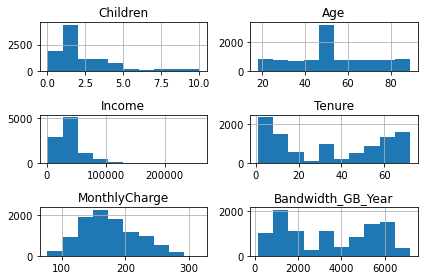

In [18]:
df[['Children', 'Age', 'Income', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']].hist()
plt.savefig('churn_pyplot.jpg')
plt.tight_layout()
# plt.close()

On the above distributions, Monthly Charge is roughly normal, which is to be expected. The Income and Children variables approximate either a binomial distribution or a Poisson distribution which is on par with expected results.

The Age variable shows a large spike around the age of 50, which makes sense due to the data replacement I made in earlier steps. Blank, NA, null, and 0 values were replaced with the median age which contributes to the visualization we see above.

#### Saving the cleaned dataframe to a new CSV file

In [19]:
df.to_csv('churned_cleaned.csv')

### D6: Limitations of the Data

Limitations of the cleaning process occur where imputation was used to modify the data. Monthly Billing and Age are two examples of such. Using the median value for null/blank data fields in age allowed for principal component analysis to occur. However, by using the median value some degree of accuracy is lost, especially in the larger picture of the data set. With the age variable, there will be customers that do not have their true age after imputation. 

Another example is bandwidth_GB_year. By using imputation, the median value of bandwidth_GB_year, there will be customers in the data set that do not have an accurate representation of their true bandwidth consumption thus skewing the results.

### D7: Impact of the Limitaitons of the Data

The aforementioned limitations in the data cleaning may have an impact on the interpretation of the results of the data. Using the median value for Monthly Billing might be a good metric for an accounting department wishing to provide revenue estimates, but a sales manager could be missing opportunities to provide upgrade packages or additional services. 

Imputation on the age and bandwith_GB_year could influence the companies marketing decisions. Customers could be grouped into "high usage" and "low usage" categories. If a customer is shown to use little bandwidth per year when their true bandwidth usage is high, the company could be missing an opportunity to sell the customer a different internet package with higher internet speeds. Moreover, senior citizens and young adults are in different market segments. Products or services typically associated with young adults, such as sports packages and complimentary subscription servers, may not be useful to an elderly customer whereas an elderly customer might be more interested in having a landline phone connection. If age is incorrectly estimated this raises difficulties in accurately marketing to the company's customers.

## E: Principle Component Analysis

E.  Apply principal component analysis (PCA) to identify the significant features of the data set by doing the following:

1.  List the principal components in the data set.

2.  Describe how you identified the principal components of the data set.

3.  Describe how the organization can benefit from the results of the PCA

PCA will be performed using the below variables:

In [20]:
df_pca = df[['Population','Children','Age','Income','Outage_sec_perweek','Email','Contacts','Yearly_equip_failure','Tenure','MonthlyCharge','Bandwidth_GB_Year']]

Normalizaing the data:

In [21]:
df_pca_normalized=(df_pca-df_pca.mean())/df_pca.std()

Selecting the number of components to extract:

In [22]:
pca = PCA(n_components=df_pca.shape[1])

Convert the dataset of variables into dataset of components:

In [23]:
pca.fit(df_pca_normalized)
df_pca_components = pd.DataFrame(pca.transform(df_pca_normalized),     
     columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11'])

Create and display Scree Plot:

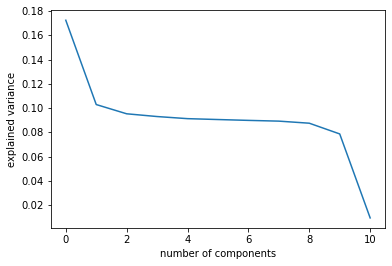

In [24]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.show()

Extracting the eigenvalues:

In [25]:
cov_matrix = np.dot(df_pca_normalized.T, df_pca_normalized) / df_pca_components.shape[0]
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]

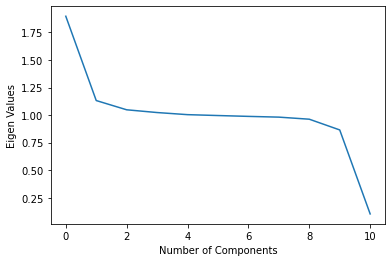

In [26]:
plt.plot(eigenvalues)
plt.xlabel('Number of Components')
plt.ylabel('Eigen Values')
plt.show();

Choose the fewest components from the PCA:

In [27]:
# Select the fewest components 
for pc, var in zip(['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11'], np.cumsum(pca.explained_variance_ratio_)):
    print(pc, var)

PC1 0.17244993159605304
PC2 0.2753495936482726
PC3 0.3706212623504477
PC4 0.46362429558505946
PC5 0.5548872112206896
PC6 0.6454219069153501
PC7 0.7352552793560467
PC8 0.8244724601975989
PC9 0.9119783436096773
PC10 0.9906307587163313
PC11 1.0000000000000002


From the above, 7 components account for approximately 73% of the variance. 8 components account for approximately 82% of the variance.

In [28]:
# Output loadings for components
loaded_components = pd.DataFrame(pca.components_.T,
                       columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11'],
                       index = df_pca.columns)
loaded_components

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
Population,-0.000410,-0.055172,-0.317127,-0.384422,-0.037651,0.658501,0.434816,-0.050178,-0.349257,0.000863,-0.000976
Children,-0.001874,0.023430,0.553580,-0.199589,0.052694,0.210905,-0.492439,0.257462,-0.544687,0.009920,-0.018410
Age,-0.012381,-0.047600,-0.364657,0.519582,-0.102786,0.199533,-0.439573,-0.480542,-0.323942,0.121304,0.021550
Income,0.006197,-0.004281,0.241758,0.178934,0.767896,0.414818,0.000105,-0.210840,0.313780,-0.069494,0.001165
Outage_sec_perweek,0.022599,0.706399,0.021625,-0.010069,0.014757,0.057495,0.053024,0.016099,0.052074,0.700439,0.000612
Email,-0.021292,0.057703,-0.335480,-0.526402,-0.057022,0.171801,-0.602346,-0.006356,0.455852,-0.055768,0.005589
Contacts,0.004533,-0.007842,-0.433968,0.330427,0.246842,0.091689,-0.090491,0.789002,-0.048146,0.005481,-0.002978
Yearly_equip_failure,0.015836,0.058207,0.302058,0.349379,-0.574507,0.515659,0.028153,0.167224,0.376851,-0.127730,-0.002464
Tenure,0.704915,-0.058213,-0.018176,-0.004509,-0.003199,-0.000671,-0.017972,-0.015981,0.010902,0.038116,-0.705120
MonthlyCharge,0.045221,0.696325,-0.092961,0.040624,0.033253,-0.053477,0.012068,-0.068953,-0.151394,-0.684597,-0.048335


### E3. Benefits

PCA (Principle component analysis) is the perfect method to use to engage this project. PCA allows one to remove the dimensionality (variables) from a data set. By removing the dimensionality of data, data can be more easily visualized. Although PCA does result in information loss, the data loss is usually minor. Through PCA, the interpretability of the data is increased by creating new and uncorrelated variables.

As an example, the data above suggest that the tenth principle component has a large positive value between outage_sec_week and MonthlyCharge.  Understandably so, it makes intuitive sense that a company would aim to focus on both outages and monthly charges as both of these variables would have a strong relationship with both customer satisfaction and customer retention. However, there is an actionable analysis instead of intuition alone. This should be noted by the company appropriately to reduce the overall churn rate of its customer base and increase the retention period of customers.

## Part H: Citations and References

Pandas documentation. pandas documentation - pandas 1.4.3 documentation. (n.d.). Retrieved August 25, 2022, from https://pandas.pydata.org/docs/ 

